### **PREPROCESSING THE DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv("/content/earthquake_india.csv")

In [ ]:
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,NaN,MAGNITUDE,NaN,NaN,NaN,NaN,NaN,LAT (N),LONG (E),DEPTH (km),INTENSITY,NaN,NaN,LOCATION,REFERENCE
1,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
2,1,2000,1,2,10.23.55.1,NaN,5.0156,5.0156,NaN,4.71884057971015,4.43362521891419,4.82014690451207,29.59,68.15,33,NaN,NaN,NaN,NaN,NEIC / USGS
3,2,2000,1,2,102358.98,NaN,NaN,5.326,5,5,4.97723292469352,5.14585519412382,27.38,92.71,33,NaN,NaN,NaN,NaN,NEIC / USGS
4,3,2000,1,2,10.23.55.1,NaN,5.0156,5.0156,NaN,4.71884057971015,4.43362521891419,4.82014690451207,27.596,92.568,5.8,NaN,NaN,NaN,Xizang,ISC
5,4,2000,1,3,22.34.13.9,NaN,4.7658,4.7658,NaN,4.49257246376812,3.99614711033275,4.55802728226653,27.22,92.42,33,NaN,NaN,NaN,NaN,NEIC / USGS
6,5,2000,1,3,223412.64,NaN,NaN,4.8844,4.6,4.6,4.20385288966725,4.68247639034628,30.26,68,33,NaN,NaN,NaN,NaN,NEIC / USGS


In [ ]:
df.tail()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
26101,26100,2019,7,28,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.07427536231884,1.25394045534151,2.91500524658972,32.8°N,78.4°E,10,NaN,NaN,NaN,Jammu & Kashmir,NaN
26102,26101,2019,7,28,10:44:10,16:14:10,3.6,3.6,NaN,3.43659420289855,1.95446584938704,3.33473242392445,25.5°N,90.4°E,70,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
26103,26102,2019,7,28,21:25:06,29/07/19 02:55,4,4,NaN,3.79891304347826,2.65499124343258,3.75445960125918,23.2°N,86.5°E,22,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
26104,26103,2019,7,29,3:33:53,9:03:53,4.3,4.3,NaN,4.07065217391304,3.18038528896673,4.06925498426023,32.8°N,76.4°E,20,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN
26105,26104,2019,7,31,14:50:02,20:20:02,3,3,NaN,2.89311594202899,0.903677758318739,2.70514165792235,20.0°N,72.8°E,10,NaN,NaN,NaN,"Distt. Palghar, Maharashtra",NaN


In [ ]:
df.head(10).append(df.tail(10))

<ipython-input-29-a1c708a76b12>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(10).append(df.tail(10))


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,NaN,MAGNITUDE,NaN,NaN,NaN,NaN,NaN,LAT (N),LONG (E),DEPTH (km),INTENSITY,NaN,NaN,LOCATION,REFERENCE
1,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
2,1,2000,1,2,10.23.55.1,NaN,5.0156,5.0156,NaN,4.71884057971015,4.43362521891419,4.82014690451207,29.59,68.15,33,NaN,NaN,NaN,NaN,NEIC / USGS
3,2,2000,1,2,102358.98,NaN,NaN,5.326,5,5,4.97723292469352,5.14585519412382,27.38,92.71,33,NaN,NaN,NaN,NaN,NEIC / USGS
4,3,2000,1,2,10.23.55.1,NaN,5.0156,5.0156,NaN,4.71884057971015,4.43362521891419,4.82014690451207,27.596,92.568,5.8,NaN,NaN,NaN,Xizang,ISC
5,4,2000,1,3,22.34.13.9,NaN,4.7658,4.7658,NaN,4.49257246376812,3.99614711033275,4.55802728226653,27.22,92.42,33,NaN,NaN,NaN,NaN,NEIC / USGS
6,5,2000,1,3,223412.64,NaN,NaN,4.8844,4.6,4.6,4.20385288966725,4.68247639034628,30.26,68,33,NaN,NaN,NaN,NaN,NEIC / USGS
7,6,2000,1,3,22.34.13.9,NaN,4.7658,4.7658,NaN,4.49257246376812,3.99614711033275,4.55802728226653,22.115,92.81,45.6,NaN,NaN,NaN,Eastern Xizang-India border region,ISC
8,7,2000,1,5,94518.71,NaN,NaN,5.878,5.5,5.5,5.94395796847636,5.72507869884575,29.72,68.2,33,NaN,NaN,NaN,NaN,NEIC / USGS
9,8,2000,1,5,130817.76,NaN,NaN,4.1116,3.9,3.9,2.85043782837128,3.87156348373557,35.65,95.91,33,NaN,NaN,NaN,NaN,NEIC / USGS


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26106 entries, 0 to 26105
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   26105 non-null  object
 1   Unnamed: 1   26105 non-null  object
 2   Unnamed: 2   26103 non-null  object
 3   Unnamed: 3   26102 non-null  object
 4   Unnamed: 4   10695 non-null  object
 5   Unnamed: 5   427 non-null    object
 6   Unnamed: 6   20547 non-null  object
 7   Unnamed: 7   25475 non-null  object
 8   Unnamed: 8   5560 non-null   object
 9   Unnamed: 9   25474 non-null  object
 10  Unnamed: 10  26105 non-null  object
 11  Unnamed: 11  26105 non-null  object
 12  Unnamed: 12  26105 non-null  object
 13  Unnamed: 13  26105 non-null  object
 14  Unnamed: 14  26102 non-null  object
 15  Unnamed: 15  17 non-null     object
 16  Unnamed: 16  1 non-null      object
 17  Unnamed: 17  1 non-null      object
 18  Unnamed: 18  4126 non-null   object
 19  Unnamed: 19  24523 non-nu

In [ ]:
cols=['si.no','Year','Month','Date','Origin Time','NaN','Magnitude','Mw','Mb','mb','Ms','Ml','Latitude','Longitude','Depth','Intensity','MMI','MME','Location','Referrence']
df= pd.read_csv("/content/earthquake_india.csv",names=cols)
df.head()

,si.no,Year,Month,Date,Origin Time,NaN,Magnitude,Mw,Mb,mb,Ms,Ml,Latitude,Longitude,Depth,Intensity,MMI,MME,Location,Referrence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,NaN,MAGNITUDE,NaN,NaN,NaN,NaN,NaN,LAT (N),LONG (E),DEPTH (km),INTENSITY,NaN,NaN,LOCATION,REFERENCE
2,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
3,1,2000,1,2,10.23.55.1,NaN,5.0156,5.0156,NaN,4.71884057971015,4.43362521891419,4.82014690451207,29.59,68.15,33,NaN,NaN,NaN,NaN,NEIC / USGS
4,2,2000,1,2,102358.98,NaN,NaN,5.326,5,5,4.97723292469352,5.14585519412382,27.38,92.71,33,NaN,NaN,NaN,NaN,NEIC / USGS


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26107 entries, 0 to 26106
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   si.no        26105 non-null  object
 1   Year         26105 non-null  object
 2   Month        26103 non-null  object
 3   Date         26102 non-null  object
 4   Origin Time  10695 non-null  object
 5   NaN          427 non-null    object
 6   Magnitude    20547 non-null  object
 7   Mw           25475 non-null  object
 8   Mb           5560 non-null   object
 9   mb           25474 non-null  object
 10  Ms           26105 non-null  object
 11  Ml           26105 non-null  object
 12  Latitude     26105 non-null  object
 13  Longitude    26105 non-null  object
 14  Depth        26102 non-null  object
 15  Intensity    17 non-null     object
 16  MMI          1 non-null      object
 17  MME          1 non-null      object
 18  Location     4126 non-null   object
 19  Referrence   24523 non-nu

In [ ]:
df.shape


(26107, 20)

In [ ]:
columns_to_drop = ['si.no', 'NaN', 'Mw', 'Mb', 'mb', 'Ms', 'Ml', 'Intensity', 'MMI', 'MME', 'Location', 'Referrence']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df.shape

(26107, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26107 entries, 0 to 26106
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         26105 non-null  object
 1   Month        26103 non-null  object
 2   Date         26102 non-null  object
 3   Origin Time  10695 non-null  object
 4   Magnitude    20547 non-null  object
 5   Latitude     26105 non-null  object
 6   Longitude    26105 non-null  object
 7   Depth        26102 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [ ]:
columns_to_convert = ['Year', 'Month', 'Date', 'Magnitude', 'Latitude', 'Longitude', 'Depth']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Checking the updated data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26107 entries, 0 to 26106
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26104 non-null  float64
 1   Month        26102 non-null  float64
 2   Date         26101 non-null  float64
 3   Origin Time  10695 non-null  object 
 4   Magnitude    20545 non-null  float64
 5   Latitude     23686 non-null  float64
 6   Longitude    23686 non-null  float64
 7   Depth        26101 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.6+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)


In [ ]:
df.head()

,Year,Month,Date,Origin Time,Magnitude,Latitude,Longitude,Depth
0,2000.0,1.0,2.0,10.23.55.1,5.0156,29.590,68.150,33.0
1,2000.0,1.0,2.0,102358.98,NaN,27.380,92.710,33.0
2,2000.0,1.0,2.0,10.23.55.1,5.0156,27.596,92.568,5.8
3,2000.0,1.0,3.0,22.34.13.9,4.7658,27.220,92.420,33.0
4,2000.0,1.0,3.0,223412.64,NaN,30.260,68.000,33.0


In [ ]:
df.tail()

,Year,Month,Date,Origin Time,Magnitude,Latitude,Longitude,Depth
26099,2019.0,7.0,28.0,19:24:08,3.2,NaN,NaN,10.0
26100,2019.0,7.0,28.0,10:44:10,3.6,NaN,NaN,70.0
26101,2019.0,7.0,28.0,21:25:06,4.0,NaN,NaN,22.0
26102,2019.0,7.0,29.0,3:33:53,4.3,NaN,NaN,20.0
26103,2019.0,7.0,31.0,14:50:02,3.0,NaN,NaN,10.0


In [ ]:
columns_to_convert_to_int = ['Year', 'Month', 'Date']

df[columns_to_convert_to_int] = df[columns_to_convert_to_int].astype('Int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26104 non-null  Int64  
 1   Month        26102 non-null  Int64  
 2   Date         26101 non-null  Int64  
 3   Origin Time  10693 non-null  object 
 4   Magnitude    20545 non-null  float64
 5   Latitude     23686 non-null  float64
 6   Longitude    23686 non-null  float64
 7   Depth        26101 non-null  float64
dtypes: Int64(3), float64(4), object(1)
memory usage: 1.7+ MB


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
columns_to_convert = ['Magnitude', 'Latitude', 'Longitude', 'Depth']

# Round the floating-point values and then convert to integers
df[columns_to_convert] = df[columns_to_convert].round().astype('Int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         26104 non-null  Int64 
 1   Month        26102 non-null  Int64 
 2   Date         26101 non-null  Int64 
 3   Origin Time  10693 non-null  object
 4   Magnitude    20545 non-null  Int64 
 5   Latitude     23686 non-null  Int64 
 6   Longitude    23686 non-null  Int64 
 7   Depth        26101 non-null  Int64 
dtypes: Int64(7), object(1)
memory usage: 1.8+ MB


In [ ]:
# Calculate the mean of the 'Magnitude' column
magnitude_median = df['Magnitude'].median()

# Fill null values in the 'Magnitude' column with the mean
df['Magnitude'].fillna(magnitude_median, inplace=True)



In [ ]:
25,35,1,7,20

(25, 35, 1, 7, 20)

In [ ]:
# Calculate the mean of the 'Magnitude' column
latitude_median = df['Latitude'].median()

# Fill null values in the 'Magnitude' column with the mean
df['Latitude'].fillna(latitude_median, inplace=True)


In [ ]:
# Calculate the mean of the 'Magnitude' column
longitude_median = df['Longitude'].median()

# Fill null values in the 'Magnitude' column with the mean
df['Longitude'].fillna(longitude_median, inplace=True)


In [ ]:
# Calculate the mean of the 'Magnitude' column
depth_median = df['Depth'].median()

# Fill null values in the 'Magnitude' column with the mean
df['Depth'].fillna(depth_median, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         26104 non-null  Int64 
 1   Month        26102 non-null  Int64 
 2   Date         26101 non-null  Int64 
 3   Origin Time  10693 non-null  object
 4   Magnitude    26104 non-null  Int64 
 5   Latitude     26104 non-null  Int64 
 6   Longitude    26104 non-null  Int64 
 7   Depth        26104 non-null  Int64 
dtypes: Int64(7), object(1)
memory usage: 1.8+ MB


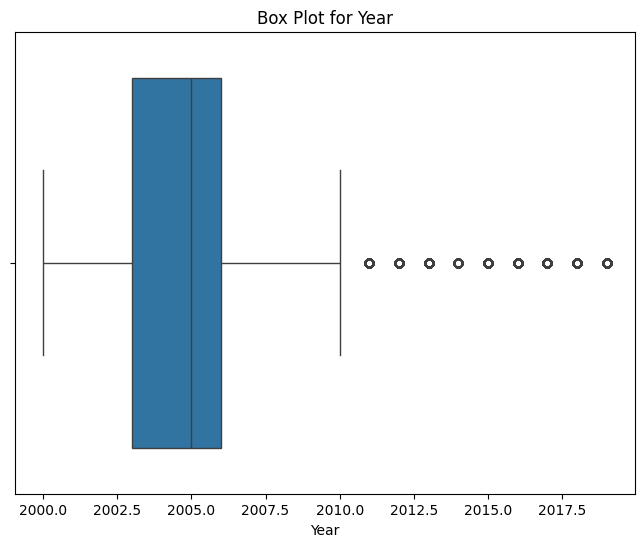

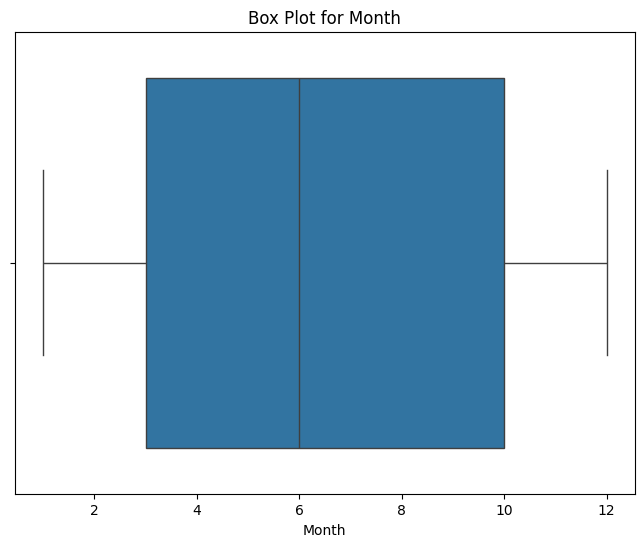

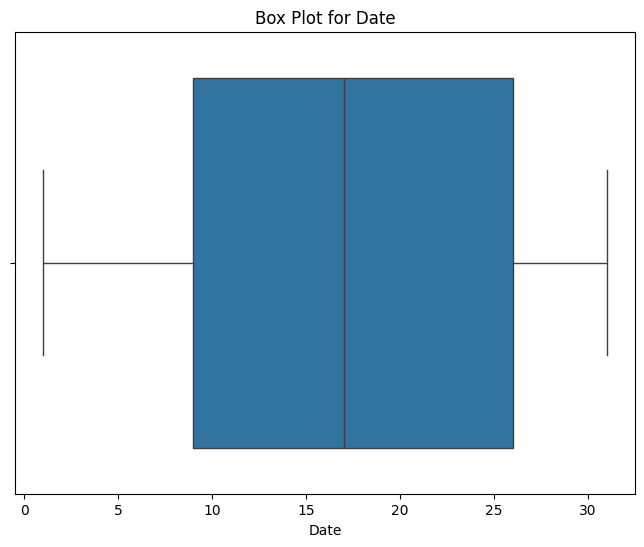

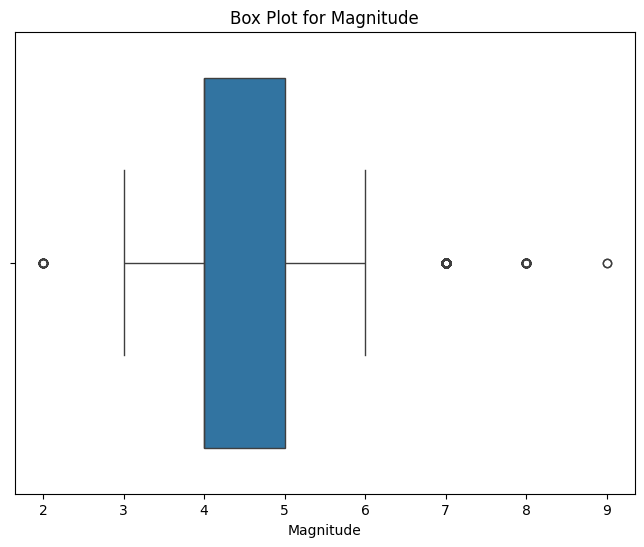

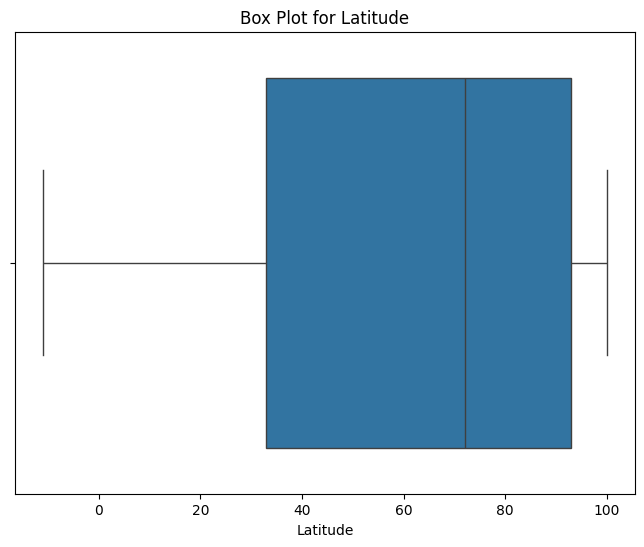

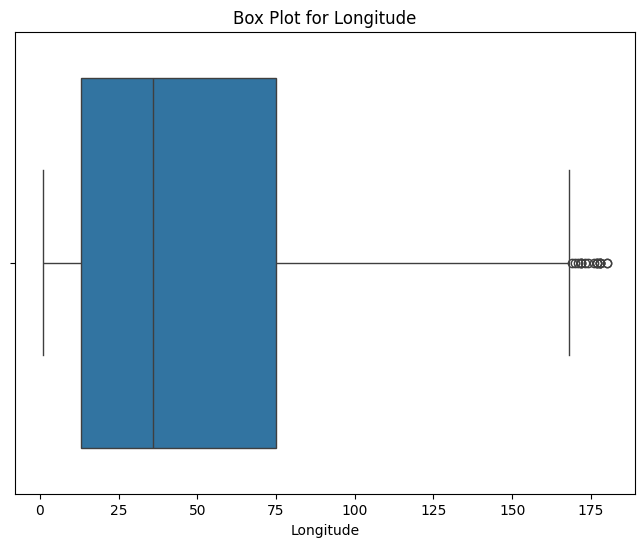

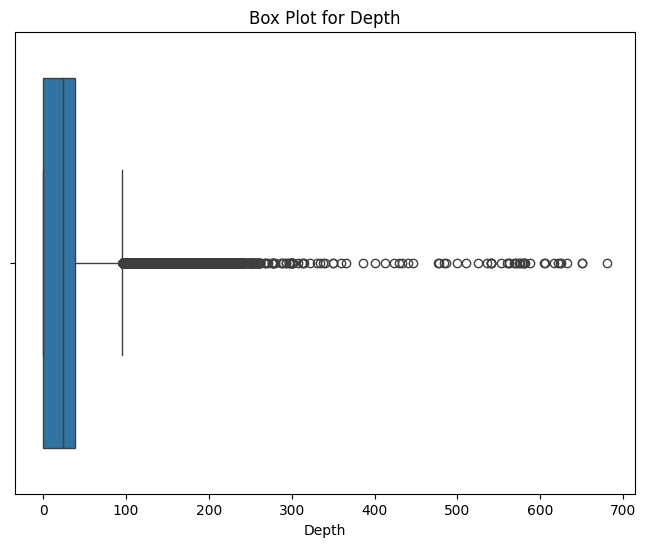

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for each numerical column
for column in df.columns:
    if df[column].dtype == 'Int64':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot for {column}')
        plt.show()


In [ ]:
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=[0,2,4, 6, 8], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
df['Magnitude_Category'].value_counts()

Medium       19108
High          6763
Very High      208
Low             23
Name: Magnitude_Category, dtype: int64

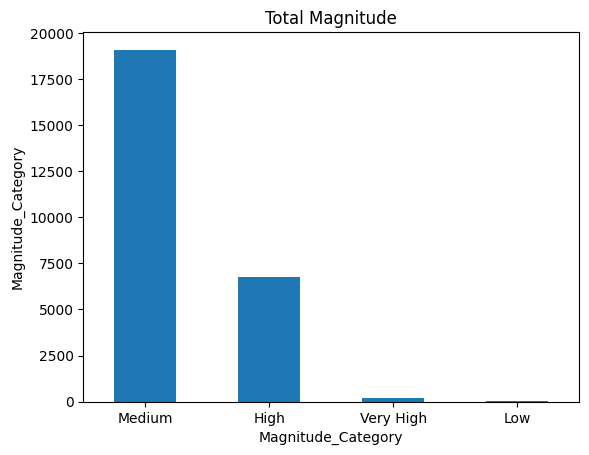

In [ ]:
labels = ["Medium","High","Very High","Low"]
count_magnitude = df.value_counts(df["Magnitude_Category"] , sort=True)
count_magnitude.plot(kind = 'bar', rot =0)
mlt.title("Total Magnitude")
mlt.ylabel("Magnitude_Category")
mlt.xticks(range(4),labels)
mlt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Year                26104 non-null  Int64   
 1   Month               26102 non-null  Int64   
 2   Date                26101 non-null  Int64   
 3   Origin Time         10693 non-null  object  
 4   Magnitude           26104 non-null  Int64   
 5   Latitude            26104 non-null  Int64   
 6   Longitude           26104 non-null  Int64   
 7   Depth               26104 non-null  Int64   
 8   Magnitude_Category  26102 non-null  category
dtypes: Int64(7), category(1), object(1)
memory usage: 1.8+ MB


In [ ]:
# Create a mapping dictionary
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High':3}

# Apply the mapping
df['Magnitude_Category'] = df['Magnitude_Category'].map(category_mapping)


In [ ]:
# Assuming 'Magnitude_Category' is the name of your categorical column
df['Magnitude_Category'] = pd.Categorical(df['Magnitude_Category'])
df['Magnitude_Category'] = df['Magnitude_Category'].cat.codes.astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                26104 non-null  Int64 
 1   Month               26102 non-null  Int64 
 2   Date                26101 non-null  Int64 
 3   Origin Time         10693 non-null  object
 4   Magnitude           26104 non-null  Int64 
 5   Latitude            26104 non-null  Int64 
 6   Longitude           26104 non-null  Int64 
 7   Depth               26104 non-null  Int64 
 8   Magnitude_Category  26104 non-null  int64 
dtypes: Int64(7), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
magnitude_mean = df['Magnitude'].mean()
print(f'Mean Magnitude: {magnitude_mean}')


Mean Magnitude: 4.295050566962917


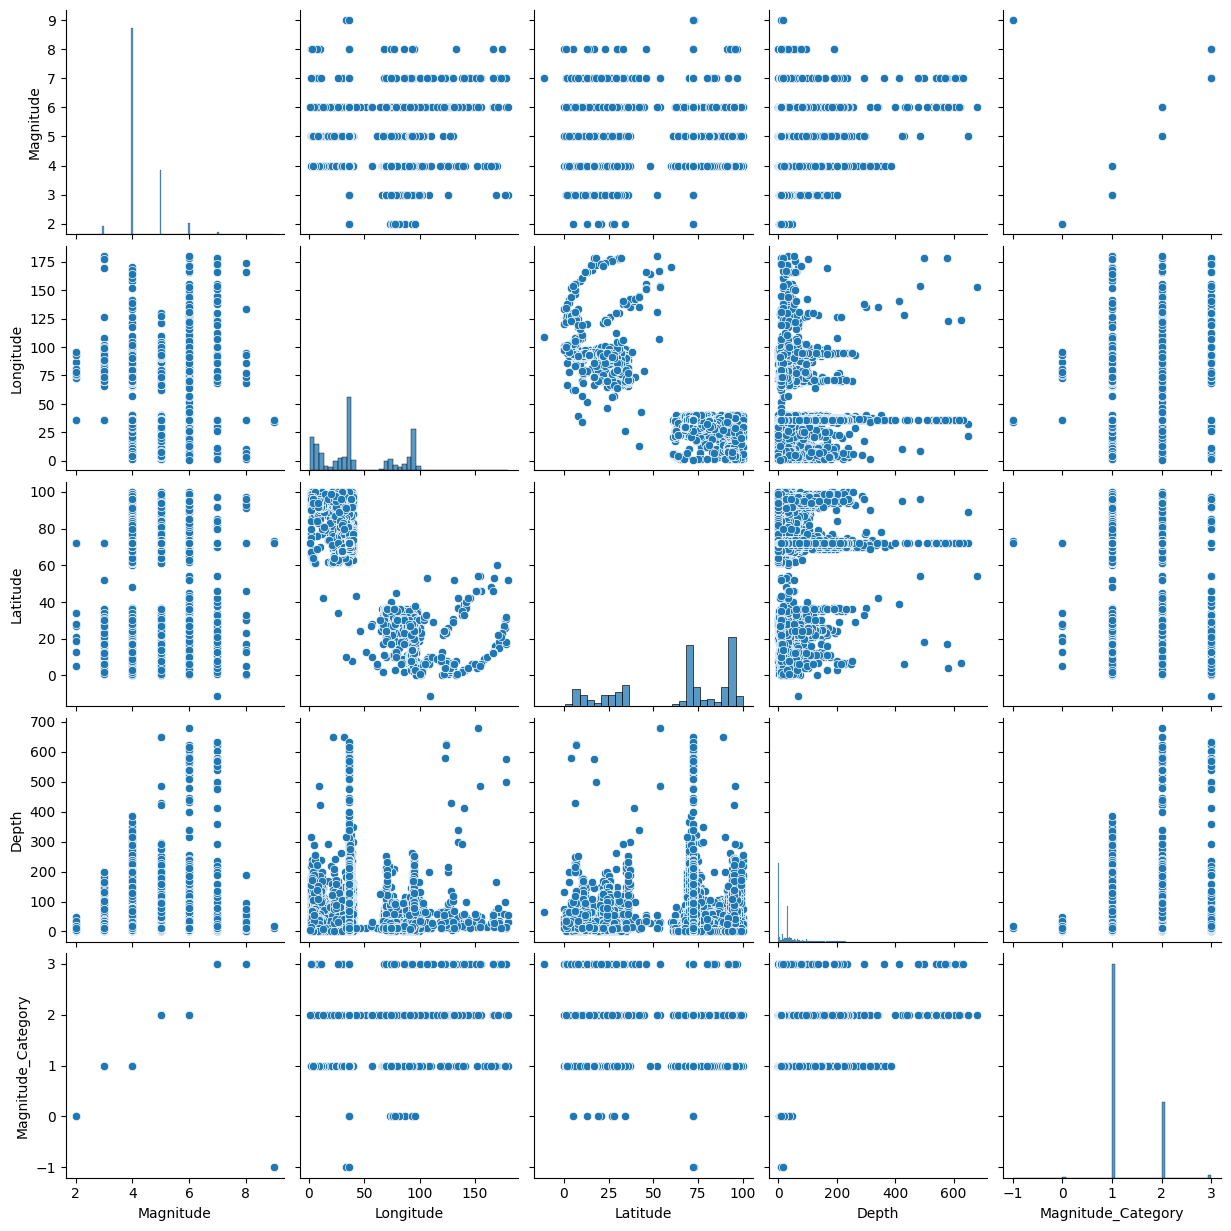

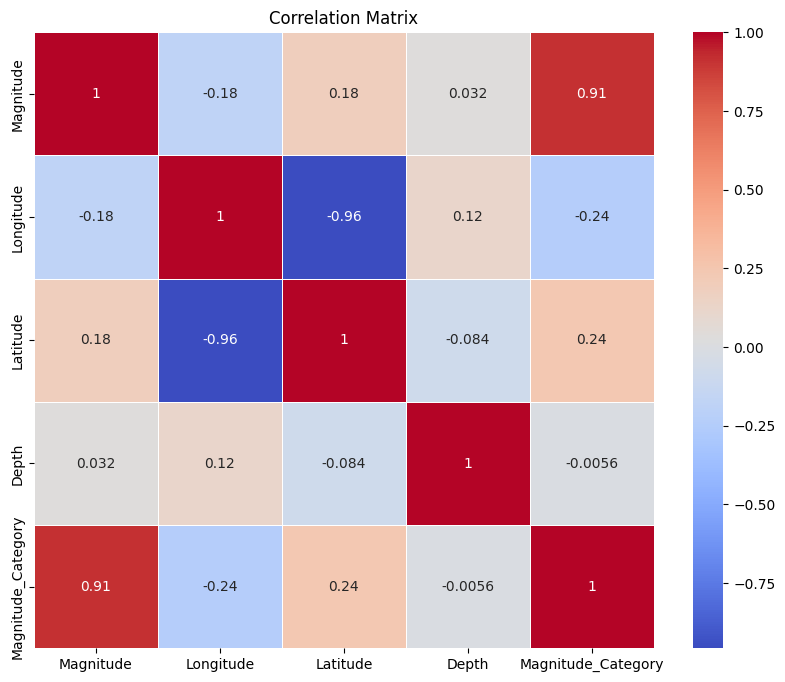

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features
# Replace 'features' with the actual column names of your features
features = ['Magnitude','Longitude', 'Latitude', 'Depth', 'Magnitude_Category']

# Create a pair plot for distributions
sns.pairplot(df[features])
plt.show()

# Create a heatmap for correlation matrix
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()




```

```

### **REGRESSION MODELS**

*   linear regression
*   decision tree regression
*   random forest regression
*   support vector regression
*   knn regression



*   Multi-layerpreception regression



### **LINEAR REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [ ]:
# Assuming your data is in a DataFrame named df
# X should be the feature variables, and y should be the target variable
X = df[['Latitude', 'Longitude','Depth','Magnitude_Category']]
y = df['Magnitude']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Latitude              0
Longitude             0
Depth                 0
Magnitude_Category    0
dtype: int64
0


In [ ]:
print(np.isfinite(X_train).all())
print(np.isfinite(y_train).all())


Latitude              True
Longitude             True
Depth                 True
Magnitude_Category    True
dtype: bool
True


In [ ]:
X_train['Magnitude_Category'].fillna(X_train['Magnitude_Category'].mode()[0], inplace=True)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_pred))

Length of y_test_pred: 5221


In [ ]:

# Evaluate the model performance on the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.05484219851073223
Mean Absolute Error (MAE): 0.1270098964704304
R-squared (R2): 0.8488036591622319


In [ ]:
# Assuming X_new is a DataFrame with the new data for prediction
X_new = pd.DataFrame({'Latitude': [40], 'Longitude': [50], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 5.198952712716207


In [ ]:
print(len(y_test), len(y_pred))


5221 1


In [ ]:
print(X_test.isnull().sum())


Latitude              0
Longitude             0
Depth                 0
Magnitude_Category    0
dtype: int64


In [ ]:
print(y_pred)


[5.19895271]


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_test_pred))

Length of y_test_pred: 5221


In [ ]:
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

# Print the content of y_pred
print("y_pred:", y_pred)


Length of X_test: 5221
Length of y_test: 5221
Length of y_pred: 5221
y_pred: [3.95353181 3.99229555 5.20218052 ... 3.93630638 3.91411449 5.27692239]


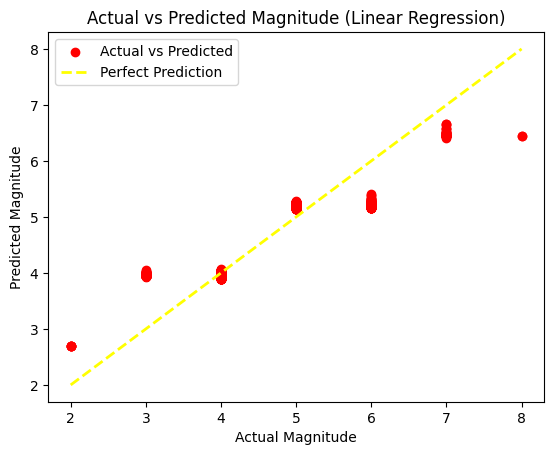

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.scatter(y_test, y_pred, color='red', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='yellow', linewidth=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitude (Linear Regression)')
plt.legend()

# Display the plot
plt.show()


### **DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df[['Latitude', 'Longitude','Depth','Magnitude_Category']]
y = df['Magnitude']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
X_new = pd.DataFrame({'Latitude': [30], 'Longitude': [68], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 5.0


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_test_pred))

Length of y_test_pred: 5221


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you already have y_test and y_pred

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')




Mean Squared Error: 0.0629837365436682
Mean Absolute Error: 0.08855469949139617
R-squared: 0.8344626512463589


In [ ]:
# Assuming X_new is a DataFrame with the new data for prediction
X_new = pd.DataFrame({'Latitude': [30], 'Longitude': [68], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 5.0


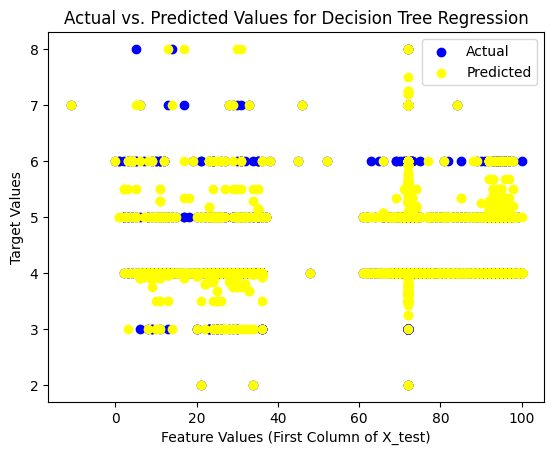

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your DecisionTreeRegressor
y_pred = model.predict(X_test)

# Assuming X_test is a DataFrame with multiple columns, and you want to use the first column
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='yellow', label='Predicted')
plt.xlabel('Feature Values (First Column of X_test)')
plt.ylabel('Target Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regression')
plt.legend()
plt.show()



### **RANDOM FOREST REGRESSION**


In [ ]:
# Features (X) and Target (y)
X = df[['Longitude', 'Latitude', 'Depth', 'Magnitude_Category']]
y = df['Magnitude']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Corrected X_new
X_new = pd.DataFrame({'Longitude': [68], 'Latitude': [34], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')


Predicted Magnitude: 5.818666666666667


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_test_pred))

Length of y_test_pred: 5221


In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.05026936462823506
Mean Absolute Error (MAE): 0.0875064151812459
R-squared (R2): 0.8678792685105523


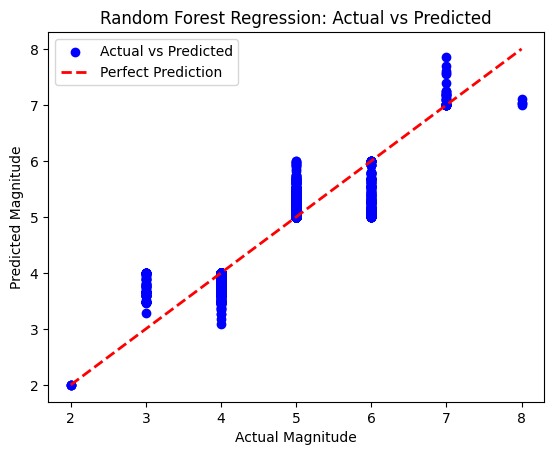

In [ ]:
# Visualize the predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()


###**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
X = df[['Longitude', 'Latitude', 'Depth', 'Magnitude_Category']]
y = df['Magnitude']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train, y_train)


SVR()

In [ ]:
# Corrected X_new
X_new = pd.DataFrame({'Longitude': [68], 'Latitude': [34], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 4.661914227940448


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_pred))

Length of y_test_pred: 5221


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.1333919234214571
Mean Absolute Error (MAE): 0.19262308472979467
R-squared (R2): 0.6494119504480782


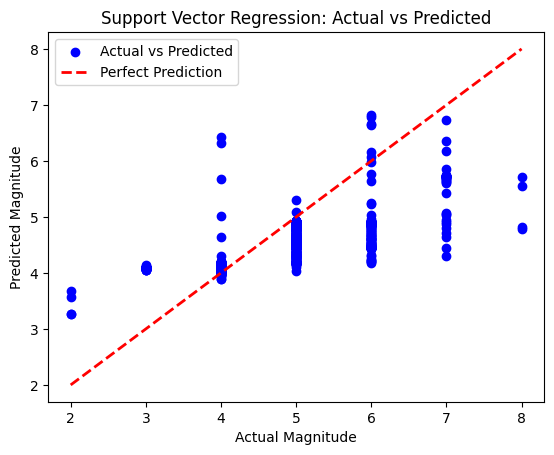

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.legend()
plt.show()


### **KNN REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
X = df[['Longitude', 'Latitude', 'Depth', 'Magnitude_Category']]
y = df['Magnitude']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
k = 5# Number of neighbors
model = KNeighborsRegressor(n_neighbors=k)


In [ ]:
model.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Corrected X_new
X_new = pd.DataFrame({'Longitude': [68], 'Latitude': [34], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 4.4


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_pred))

Length of y_test_pred: 5221


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.1542539743344187
Mean Absolute Error (MAE): 0.20042137521547598
R-squared (R2): 0.5945811514639503


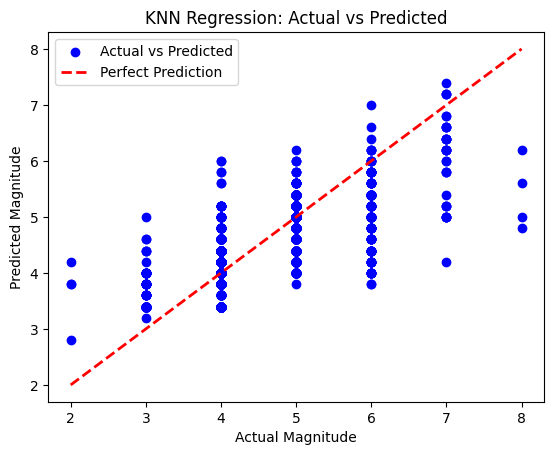

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('KNN Regression: Actual vs Predicted')
plt.legend()
plt.show()


### **MULTI-LAYER PERCEPTON REGRESSION**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X = df[['Longitude', 'Latitude', 'Depth', 'Magnitude_Category']]
y = df['Magnitude']

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # You can adjust the hidden_layer_sizes and other parameters
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.1542539743344187
Mean Absolute Error (MAE): 0.20042137521547598
R-squared (R2): 0.5945811514639503


In [ ]:
# Corrected X_new
X_new = pd.DataFrame({'Longitude': [68], 'Latitude': [34], 'Depth': [33], 'Magnitude_Category': [2]})

# Make predictions on the new data
y_pred = model.predict(X_new)
print(f'Predicted Magnitude: {y_pred[0]}')

Predicted Magnitude: 5.342358556360485


In [ ]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Check the length of y_test_pred
print("Length of y_test_pred:", len(y_pred))

Length of y_test_pred: 5221


In [ ]:
y_pred = model.predict(X_test)

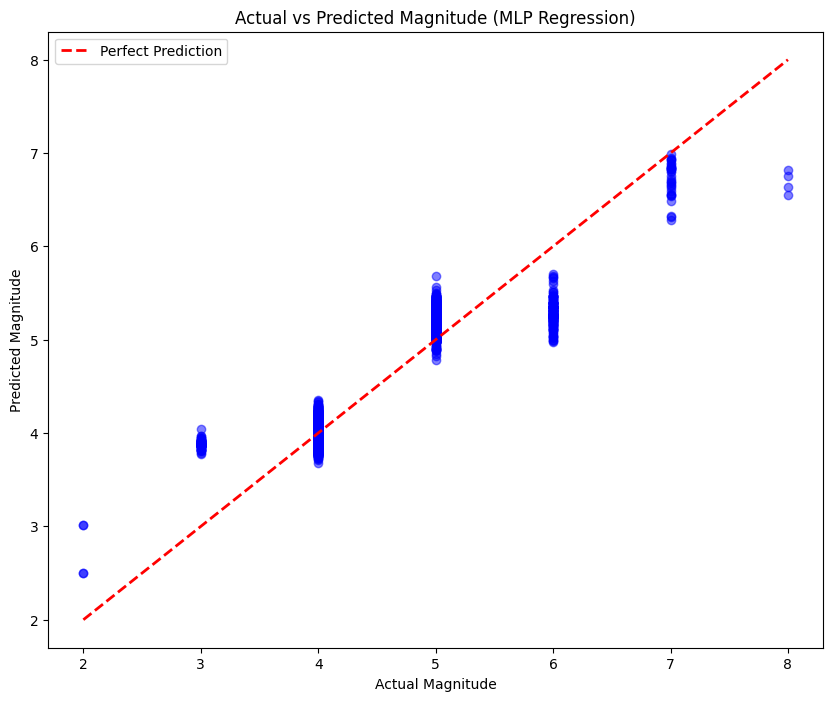

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitude (MLP Regression)')
plt.legend()
plt.show()


###**final verdict**

**LINEAR REGRESSION**


*  Mean Squared Error (MSE): 0.05828925685184593
*   Mean Absolute Error (MAE): 0.12837978042434925
*    R-squared (R2): 0.8468009430754453

**DECISION TREE REGRESSION**
*   Mean Squared Error: 0.06406448007622347
*   Mean Absolute Error: 0.08955590093312625
*   R-squared: 0.8316221811682173

**RANDOM FOREST REGRESSION**
*   Mean Squared Error (MSE): 0.05026936462823506
*  Mean Absolute Error (MAE): 0.0875064151812459
*   R-squared (R2): 0.8678792685105523

**SUPPORT VECTOR REGRESSION**
*   Mean Squared Error (MSE): 0.1333919234214571
*  Mean Absolute Error (MAE): 0.19262308472979467
*   R-squared (R2): 0.6494119504480782

**KNN REGRESSION**  
*    Mean Squared Error (MSE): 0.1542539743344187
*   Mean Absolute Error (MAE): 0.20042137521547598
*    R-squared (R2): 0.5945811514639503

**MULTI-LAYER PERCEPTON REGRESSION**


*  Mean Squared Error (MSE): 0.1542539743344187
* Mean Absolute Error (MAE): 0.20042137521547598
*  R-squared (R2): 0.5945811514639503



**RESULT**



**Conclusion:**
- **Best Performer:** Random Forest Regression has the lowest MSE and MAE, and the highest R-squared, indicating better predictive performance.
  
- **Overall Performance Order:** Random Forest > Linear Regression > Decision Tree > Support Vector > KNN > MLP

- **Considerations:** While Random Forest shows superior performance, Linear Regression also performs well and is simpler. Decision Tree is a good compromise between simplicity and accuracy. Support Vector and KNN are trailing, indicating potential challenges or suboptimal parameter settings.

- **Important Note:** The choice of the best model depends on the specific goals, dataset characteristics, and interpretability requirements. It's recommended to further fine-tune hyperparameters and possibly explore ensemble methods for improved performance.

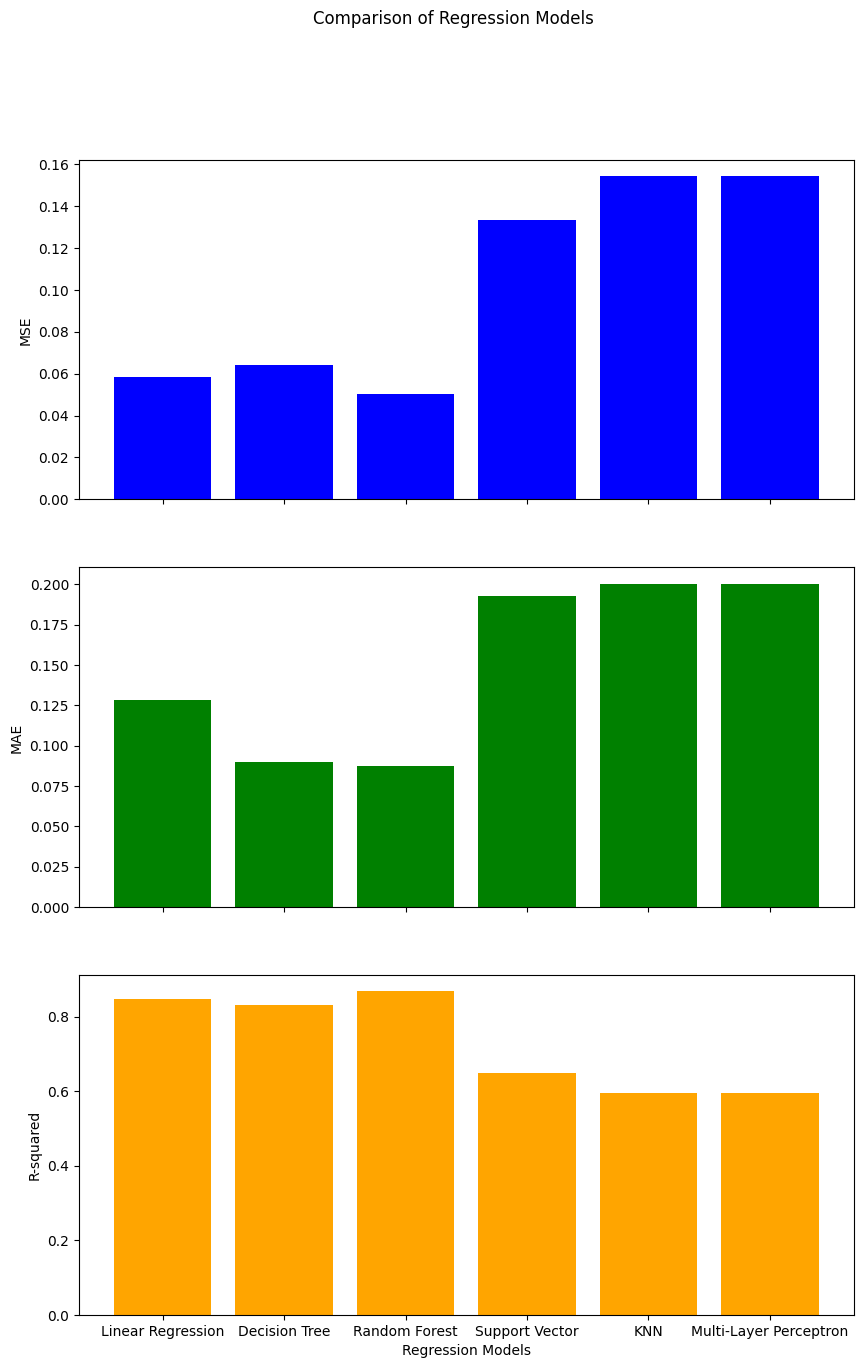

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'KNN', 'Multi-Layer Perceptron']

# Corresponding metrics
mse_values = [0.0583, 0.0641, 0.0503, 0.1334, 0.1543, 0.1543]
mae_values = [0.1284, 0.0896, 0.0875, 0.1926, 0.2004, 0.2004]
r_squared_values = [0.8468, 0.8316, 0.8679, 0.6494, 0.5946, 0.5946]

# Create subplots for each metric
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plotting MSE
ax1.bar(models, mse_values, color='blue', label='MSE')
ax1.set_ylabel('MSE')

# Plotting MAE
ax2.bar(models, mae_values, color='green', label='MAE')
ax2.set_ylabel('MAE')

# Plotting R-squared
ax3.bar(models, r_squared_values, color='orange', label='R-squared')
ax3.set_ylabel('R-squared')

# Adding labels and title
plt.xlabel('Regression Models')
plt.suptitle('Comparison of Regression Models')
plt.show()


